In [222]:
import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.io import loadmat
from glob import glob
from scipy.sparse import csr_matrix

# CONSTANTS
n_trials = 5

BIN_WIDTH = 1280
BLANK_TRIAL_LENGTH = 1500
DRIVEN_TRIAL_LENGTH = 1280
TIME_RES = 1000

V1 = 1
V2 = 2


In [223]:
# Loading Data
data_dir = "./data/v1-v2_gratings/mat_neural_data/"
data_file_l = glob(data_dir + "*.mat")
data = loadmat(data_file_l[0])


# Extracting Spikes in a python equivalent

In [224]:
neural_data = data["neuralData"]

In [225]:
spike_rasters = neural_data["spikeRasters"].item()
n_trials, n_populations = spike_rasters.shape

# A single trial consists of driven stimulus and a blank screen
n_trials /= 2

print(f"n_trials: {n_trials}")

n_trials: 3200.0


In [221]:
# yields 6400 items for V1 visual cortex where every even index is a driven signal of shape (n_neurons_in_V1, 1280 milliseconds) and the odd indices are blank input of shape (n_neurons_in_V1, 1500 milliseconds)
neural_data["spikeRasters"].item()[:, 0].shape

(6400,)

In [226]:
n_units = np.zeros(n_populations)

In [230]:
spike_rasters[0, 0].shape[0]

159

In [231]:
for populationIndex in range(n_populations):
    n_units[populationIndex] = spike_rasters[0, populationIndex].shape[0]


In [232]:
n_units

array([159.,  25.])

3200.0

In [154]:
# These are the spike rasters for v1 and v2 visual cortex respectively. 
spike_rasters_v1 = spike_rasters[:, 0]
spike_rasters_v2 = spike_rasters[:, 1]

In [ ]:
# 159 x 1280 for 159 recordings of 1280 milliseconds of gratings 
# visually shown in v1 primary visual cortex
# V1 recordings were created using a Utah array.
spike_rasters_v1[0]


<159x1280 sparse matrix of type '<class 'numpy.float64'>'
	with 3324 stored elements in Compressed Sparse Column format>

In [157]:
# 159 x 1500 for 159 recordings of 1500 milliseconds of a blank screen shown in the v1 primary visual cortex
spike_rasters_v1[1]

<159x1500 sparse matrix of type '<class 'numpy.float64'>'
	with 2062 stored elements in Compressed Sparse Column format>

In [159]:
# 25 x 1280 for 25 recordings of 1280 milliseconds of gratings
# visually shown in v2 primary visual cortex
# V2 recordings were created using tetrodes.
# There is a spatial overlap between the V1 and V2 visual cortex
spike_rasters_v2[0]

<25x1280 sparse matrix of type '<class 'numpy.float64'>'
	with 295 stored elements in Compressed Sparse Column format>

In [160]:
# 25 x 1500 for 25 recordings of 1500 milliseconds of a blank screen
# visually shown in v2 primary visual cortex
# V2 recordings were created using tetrodes.
# There is a spatial overlap between the V1 and V2 visual cortex
spike_rasters_v2[1]


<25x1500 sparse matrix of type '<class 'numpy.float64'>'
	with 178 stored elements in Compressed Sparse Column format>

In [174]:
n_trials = spike_rasters_v2[:].shape[0] // 2

In [175]:
n_trials

3200

In [167]:
spike_rasters_v2

array([<25x1280 sparse matrix of type '<class 'numpy.float64'>'
       	with 295 stored elements in Compressed Sparse Column format>,
       <25x1500 sparse matrix of type '<class 'numpy.float64'>'
       	with 178 stored elements in Compressed Sparse Column format>,
       <25x1280 sparse matrix of type '<class 'numpy.float64'>'
       	with 194 stored elements in Compressed Sparse Column format>, ...,
       <25x1500 sparse matrix of type '<class 'numpy.float64'>'
       	with 66 stored elements in Compressed Sparse Column format>,
       <25x1280 sparse matrix of type '<class 'numpy.float64'>'
       	with 35 stored elements in Compressed Sparse Column format>,
       <25x1500 sparse matrix of type '<class 'numpy.float64'>'
       	with 23 stored elements in Compressed Sparse Column format>],
      dtype=object)

In [ ]:


# spike_rasters_v2 = neural_data['spikeRasters'][0, 1]

TypeError: tuple indices must be integers or slices, not str

In [ ]:

neural_data = data["neuralData"].copy()

In [ ]:

spike_rasters = neural_data["spikeRasters"]

In [97]:
trial_id = data["neuralData"]["trialId"].item()

In [99]:
trial_id.shape

(6400, 1)

In [96]:
data["neuralData"]["unitCodes"].item()[0, 0].shape

(159, 2)

In [100]:
data["neuralData"]["unitCodes"].item().shape

(1, 2)

In [101]:
data["neuralData"]["unitCodes"].item()[0, 1].shape

(25, 2)

In [70]:
# First blank trial, V1 and V2
driven_v1 = spike_rasters.item()[0, 0] # shape: (159, 1500)
driven_v2 = spike_rasters.item()[0, 1] # shape: (25, 1500)

In [62]:
# These are the spike recordings from V1 cortex during teh 
driven_v1.shape

(159, 1280)

In [69]:
driven_v2.shape

(25, 1280)

In [ ]:
spike_rasters.item()[:, 0].shape

TypeError: unsupported operand type(s) for //: 'tuple' and 'int'

In [38]:
stim = neural_data['stim'].flatten()

In [39]:
num_trials, num_pops = spike_rasters.shape

In [43]:
num_trials

1

In [ ]:
sparse_matrix = spike_rasters[0][0]
dense_matrix = sparse_matrix.toarray() if isinstance(sparse_matrix, csr_matrix) else sparse_matrix

In [25]:
dense_matrix

array([[<159x1280 sparse matrix of type '<class 'numpy.float64'>'
        	with 3324 stored elements in Compressed Sparse Column format>,
        <25x1280 sparse matrix of type '<class 'numpy.float64'>'
        	with 295 stored elements in Compressed Sparse Column format>],
       [<159x1500 sparse matrix of type '<class 'numpy.float64'>'
        	with 2062 stored elements in Compressed Sparse Column format>,
        <25x1500 sparse matrix of type '<class 'numpy.float64'>'
        	with 178 stored elements in Compressed Sparse Column format>],
       [<159x1280 sparse matrix of type '<class 'numpy.float64'>'
        	with 2186 stored elements in Compressed Sparse Column format>,
        <25x1280 sparse matrix of type '<class 'numpy.float64'>'
        	with 194 stored elements in Compressed Sparse Column format>],
       ...,
       [<159x1500 sparse matrix of type '<class 'numpy.float64'>'
        	with 978 stored elements in Compressed Sparse Column format>,
        <25x1500 sparse ma

TypeError: Image data of dtype object cannot be converted to float

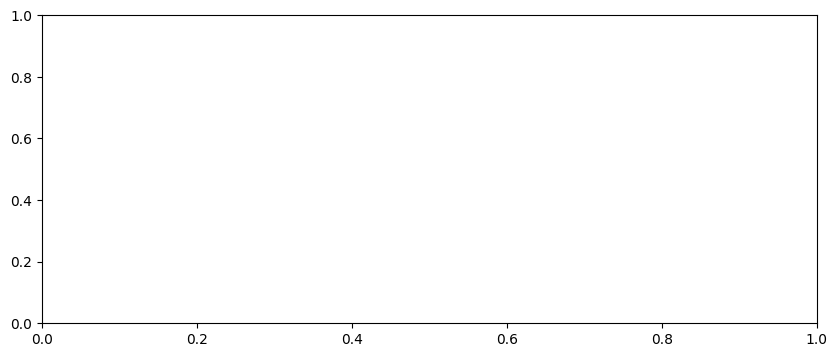

In [24]:
# Plot the dense matrix as a heatmap
plt.figure(figsize=(10, 4))
plt.imshow(dense_matrix, aspect='auto', cmap='hot', interpolation='nearest')
plt.colorbar(label="Spike Activity")
plt.xlabel("Time (ms)")
plt.ylabel("Neuron Index")
plt.title("Neural Spike Activity (Raster Plot)")
plt.show()


In [8]:
data["neuralData"]["spikeRasters"]

array([[array([[<159x1280 sparse matrix of type '<class 'numpy.float64'>'
                	with 3324 stored elements in Compressed Sparse Column format>,
                <25x1280 sparse matrix of type '<class 'numpy.float64'>'
                	with 295 stored elements in Compressed Sparse Column format>],
               [<159x1500 sparse matrix of type '<class 'numpy.float64'>'
                	with 2062 stored elements in Compressed Sparse Column format>,
                <25x1500 sparse matrix of type '<class 'numpy.float64'>'
                	with 178 stored elements in Compressed Sparse Column format>],
               [<159x1280 sparse matrix of type '<class 'numpy.float64'>'
                	with 2186 stored elements in Compressed Sparse Column format>,
                <25x1280 sparse matrix of type '<class 'numpy.float64'>'
                	with 194 stored elements in Compressed Sparse Column format>],
               ...,
               [<159x1500 sparse matrix of type '<class 'nu

In [36]:
data["neuralData"]["unitCodes"]

array([[array([[array([[ 1,  1],
                       [ 2,  1],
                       [ 2,  2],
                       [ 2,  3],
                       [ 3,  1],
                       [ 3,  2],
                       [ 4,  1],
                       [ 4,  2],
                       [ 5,  1],
                       [ 6,  1],
                       [ 7,  1],
                       [ 8,  1],
                       [ 9,  1],
                       [ 9,  2],
                       [10,  1],
                       [10,  2],
                       [11,  1],
                       [11,  2],
                       [12,  1],
                       [12,  3],
                       [13,  1],
                       [14,  1],
                       [14,  2],
                       [15,  1],
                       [15,  2],
                       [16,  1],
                       [17,  1],
                       [17,  2],
                       [17,  3],
                       [18,  1],
          